Overall, scatters should be close to the dotted line nominal=surrogate, printed numbers should all be zero. If the tests pass, I'm pretty sure Polyfit is working.

Test fitting from h5, output to npz

/home/jeffae/apprentice-jax/polyfit.py:66: RuntimeWarning: invalid value encountered in true_divide
  bin_chi2 = np.sum(np.divide(np.power((Y - surrogate_Y), 2), surrogate_Y))
/home/jeffae/apprentice-jax/polyfit.py:116: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  chi2res = {b: np.array([self.chi2[b], self.res[b]]) for b in self.chi2.keys()}


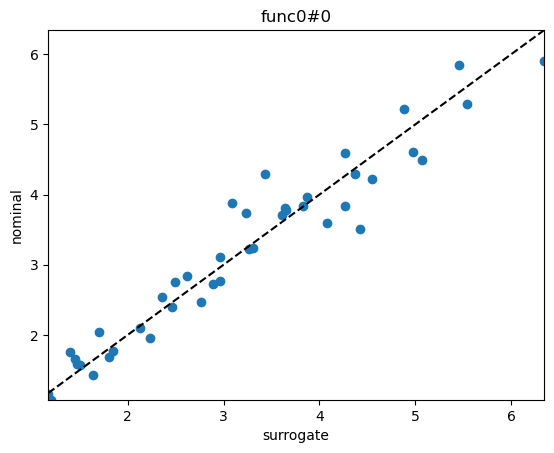

<Figure size 640x480 with 0 Axes>

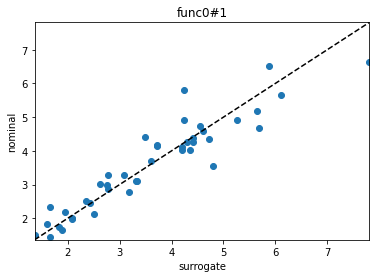

In [1]:
from polyfit import Polyfit
import matplotlib.pyplot as plt

dummy_fits = Polyfit('dummy_pceoffs.npz', 'dummy_chi2res.npz', input_h5='inputdata.h5', order=3, cov_npz = 'dummy_cov.npz')
test_surrogate, chi2_ndf, res, cov = dummy_fits.get_surrogate_func('/func0#0')
test_surrogate2, chi2_ndf2, res2, cov2= dummy_fits.get_surrogate_func(1)

X,Y = dummy_fits.get_XY('/func0#0')
fig, ax = plt.subplots()
plt.scatter(Y, test_surrogate(X))
plt.title('func0#0')
plt.xlabel('surrogate')
plt.ylabel('nominal')
ax.autoscale(tight=True)
xlim = ax.get_xlim()
plt.plot(xlim, xlim, 'k--')

plt.figure()
X1,Y1 = dummy_fits.get_XY('/func0#1')
fig, ax = plt.subplots()
plt.scatter(Y1, test_surrogate2(X))
plt.title('func0#1')
plt.xlabel('surrogate')
plt.ylabel('nominal')
ax.autoscale(tight=True)
xlim = ax.get_xlim()
plt.plot(xlim, xlim, 'k--')


Test loading from file, uses X,Y from above to test loaded surrogate

0.0
[0.]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


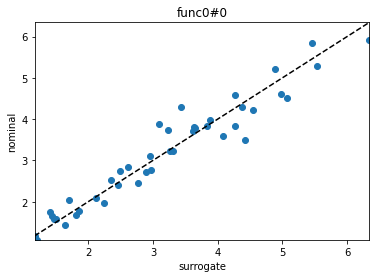

In [2]:
from polyfit import Polyfit
import matplotlib.pyplot as plt

dummy_fits = Polyfit('dummy_pceoffs.npz', 'dummy_chi2res.npz', cov_npz = 'dummy_cov.npz')
test_surrogate3, chi2_ndf_3, res3, cov3 = dummy_fits.get_surrogate_func('/func0#0')

print(chi2_ndf-chi2_ndf_3)
print(res-res3)
print(cov-cov3)

fig, ax = plt.subplots()
plt.scatter(Y, test_surrogate(X))
plt.title('func0#0')
plt.xlabel('surrogate')
plt.ylabel('nominal')
ax.autoscale(tight=True)
xlim = ax.get_xlim()
plt.plot(xlim, xlim, 'k--')